In [1]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
import scipy

%matplotlib inline

In [2]:
face = misc.face(gray=True)

In [3]:
print type(face)
print face.shape, face.dtype

<type 'numpy.ndarray'>
(768, 1024) uint8


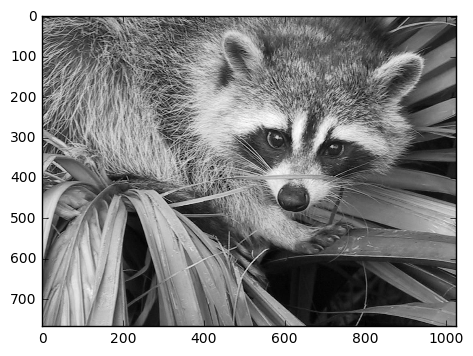

In [4]:
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

In [5]:
f = np.fft.fft2(face)
fshift = np.fft.fftshift(f)

mag = np.abs(fshift)
phase = np.angle(fshift)
real = fshift.real
imag = fshift.imag

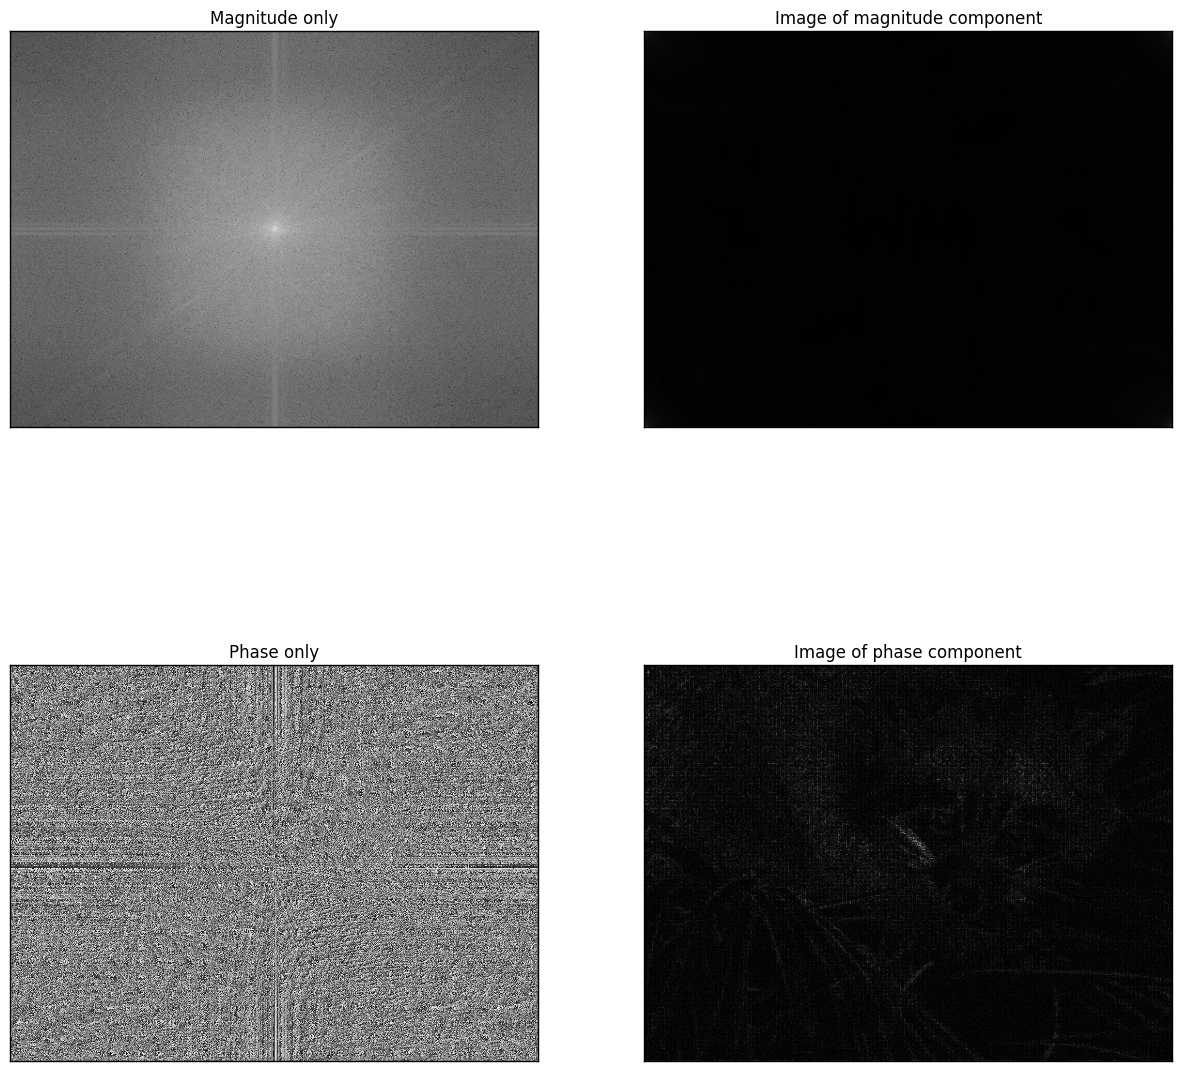

In [6]:
mag_ishift = np.fft.ifftshift(mag)
phase_ishift = np.fft.ifftshift(phase)

mag_img = np.fft.ifft2(mag_ishift*np.exp(1j*0.0))
phase_img = np.fft.ifft2(10.0*np.exp(1j*(phase_ishift)))

mag_img = np.abs(mag_img)
phase_img = np.abs(phase_img)

plt.figure(figsize=(15,15))

plt.subplot(221)
plt.imshow(np.log(mag), cmap = 'gray')
plt.title('Magnitude only')
plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.imshow(mag_img, cmap = 'gray')
plt.title('Image of magnitude component')
plt.xticks([]), plt.yticks([])

plt.subplot(223)
plt.imshow(phase, cmap = 'gray')
plt.title('Phase only')
plt.xticks([]), plt.yticks([])

plt.subplot(224)
plt.imshow(phase_img, cmap = 'gray')
plt.title('Image of phase component')
plt.xticks([]), plt.yticks([])

plt.show()

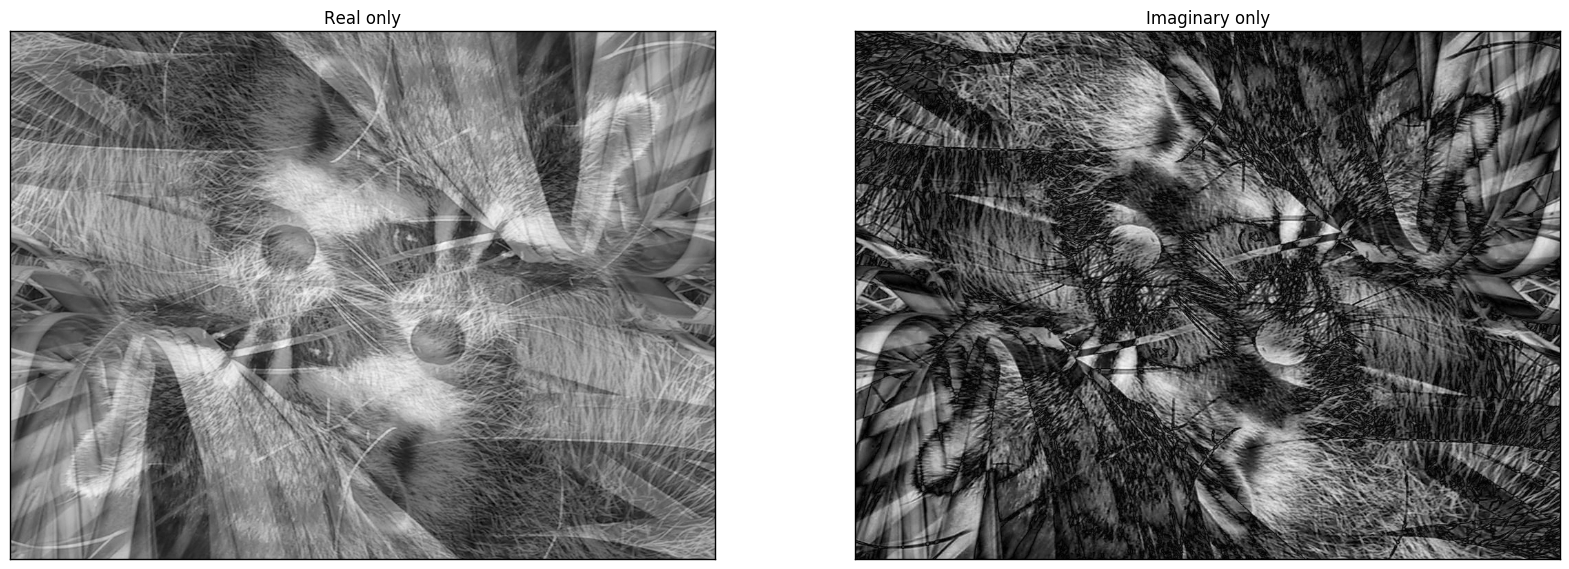

In [7]:
f_ishift = np.fft.ifftshift(real)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(20,20))

plt.subplot(121)
plt.imshow(img_back, cmap = 'gray')
plt.title('Real only')
plt.xticks([]), plt.yticks([])


f_ishift = np.fft.ifftshift(imag)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(122)
plt.imshow(img_back, cmap = 'gray')
plt.title('Imaginary only')
plt.xticks([]), plt.yticks([])

plt.show()

In [11]:
l, m = face.shape
print l, m

768 1024


In [18]:
nsample = 10

for i in range(nsample):
    u = np.random.randint(0,l) - l/2
    v = np.random.randint(0,m/2)
    print u, v

121 97
-322 78
161 246
-136 263
97 64
-104 165
289 113
286 425
-59 135
99 474


/home/ridlo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: divide by zero encountered in log


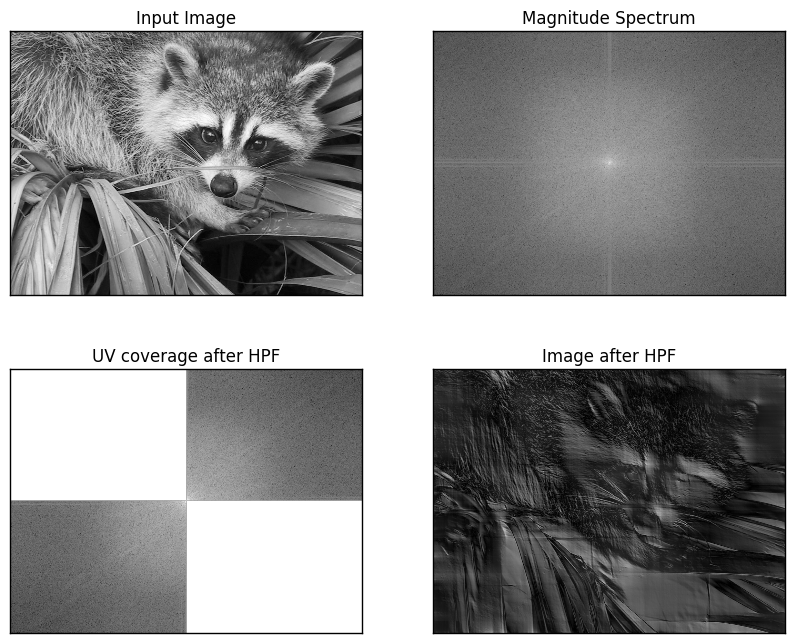

In [25]:
plt.figure(figsize=(10,8))

plt.subplot(221)
plt.imshow(face, cmap = 'gray')
plt.title('Input Image')
plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.imshow(np.log(mag), cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])

rows, cols = face.shape
crow,ccol = rows/2 , cols/2
sample = fshift.copy()
mask = np.ones(mag.shape)

mask[:l/2,:m/2] = 0
mask[l/2:,m/2:] = 0

sample = sample * mask

f_ishift = np.fft.ifftshift(sample)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(223)
plt.imshow(np.log(np.abs(sample)), cmap = 'gray')
plt.title('UV coverage after HPF')
plt.xticks([]), plt.yticks([])

plt.subplot(224)
plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF') 
plt.xticks([]), plt.yticks([])

plt.show()

/home/ridlo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in log


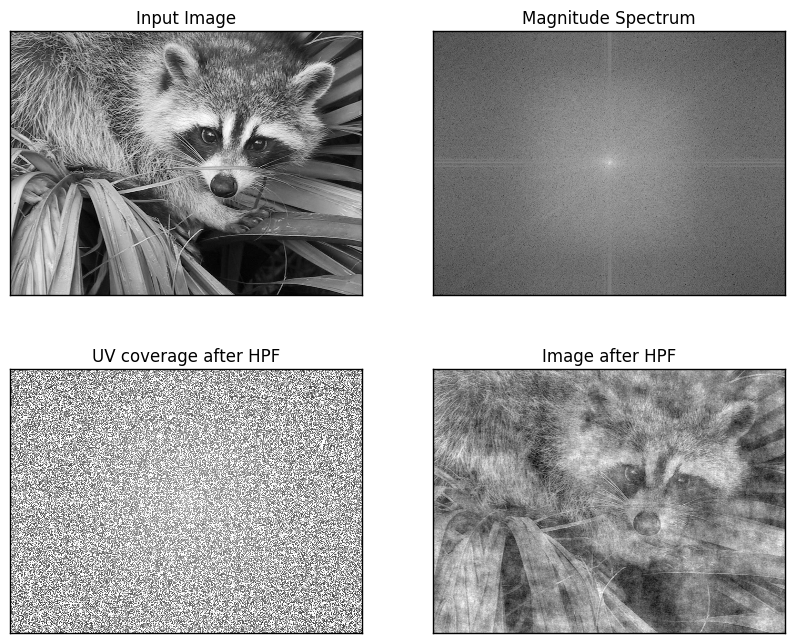

In [34]:
plt.figure(figsize=(10,8))

plt.subplot(221)
plt.imshow(face, cmap = 'gray')
plt.title('Input Image')
plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.imshow(np.log(mag), cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])

rows, cols = face.shape
crow,ccol = rows/2 , cols/2
sample = fshift.copy()
mask = np.zeros(mag.shape)

nsample = int(0.5*l*m)
for i in range(nsample): # less then, do to multiplicity in random sampling
    u = np.random.randint(0,l)
    v = np.random.randint(0,m)
    mask[u, v] = 1
    
# try random sampling
sample = sample * mask

f_ishift = np.fft.ifftshift(sample)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(223)
plt.imshow(np.log(np.abs(sample)), cmap = 'gray')
plt.title('UV coverage after HPF')
plt.xticks([]), plt.yticks([])

plt.subplot(224)
plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF') 
plt.xticks([]), plt.yticks([])

plt.show()